Attempt at Binary Decomposition with statistical methods

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, KFold,RepeatedKFold, GridSearchCV,  RandomizedSearchCV
import math
from data import *
import pandas as pd
from itertools import islice
import seaborn as sns; sns.set_theme()
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from statistics import mean

In [2]:
df = pd.read_hdf('/Users/lukemcdermott/Desktop/Physics/spectral_templates_data_version_june20.h5', key = '/binaries')
bin_df = pd.read_hdf('/Users/lukemcdermott/Desktop/Physics/spectral_templates_data_version_june20.h5', key = '/binaries')
df = df.loc[df['primary_type'] <= df['secondary_type']]
display(df)

,flux_0,flux_1,flux_2,flux_3,flux_4,flux_5,flux_6,flux_7,flux_8,flux_9,...,flux_434,flux_435,flux_436,flux_437,flux_438,flux_439,flux_440,primary_type,secondary_type,system_type
0,0.568345,0.615487,0.668477,0.705189,0.698754,0.700950,0.717146,0.704941,0.707754,0.723033,...,0.209508,0.203912,0.205196,0.201559,0.207766,0.209226,0.214793,16.0,16.0,16.0
1,0.496365,0.563067,0.602393,0.659527,0.682808,0.676481,0.674343,0.689054,0.676825,0.670386,...,0.213932,0.207528,0.206223,0.201853,0.205284,0.206424,0.206224,16.0,17.0,16.0
2,0.520227,0.580531,0.627045,0.645281,0.665795,0.678923,0.686509,0.685623,0.674414,0.702066,...,0.187648,0.184240,0.177598,0.175445,0.175319,0.181286,0.176042,16.0,16.0,16.0
3,0.483774,0.556865,0.603915,0.641451,0.698212,0.728678,0.666010,0.671234,0.659358,0.688617,...,0.233598,0.225866,0.234960,0.214639,0.219380,0.224144,0.224282,16.0,16.0,16.0
4,0.434787,0.504214,0.543165,0.611378,0.659270,0.680497,0.663214,0.634306,0.645955,0.654454,...,0.218515,0.209248,0.202981,0.198711,0.201315,0.201008,0.202865,16.0,16.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110809,0.030098,0.014580,-0.007441,-0.006942,-0.007369,0.006425,0.016458,0.006826,-0.001549,0.020413,...,-0.000636,-0.005062,-0.001746,0.002502,0.002527,0.002917,0.003646,38.0,38.0,38.0
110810,0.005596,0.004737,-0.002069,0.010406,0.006171,0.009747,0.011305,0.008200,0.004347,0.014751,...,-0.001543,-0.004403,0.001089,0.004393,0.004432,0.004561,-0.000681,38.0,39.0,38.0
110848,0.073538,0.009197,-0.005860,-0.038976,-0.014792,-0.014072,0.036644,-0.001032,-0.009587,0.015874,...,0.003452,-0.007673,-0.005274,0.000802,0.001512,0.001638,0.005702,38.0,38.0,38.0
110849,0.001377,-0.014757,-0.004499,0.012407,-0.003643,-0.001074,0.012893,-0.004316,0.009678,-0.000535,...,-0.000068,-0.007200,0.002112,0.005037,0.006211,0.005238,-0.004113,38.0,39.0,39.0


1D Discrete Classification

In [3]:
#x = np.insert(np.arange(441), 0, -1)
x = np.arange(441)
images = df.iloc[:, x].to_numpy()
labels = df.iloc[:, 441:443].to_numpy()
labels_flat = np.zeros((len(labels)))
for idx, i in enumerate(labels):
    labels_flat[idx] = 24*(int(i[0]-16)) + int((i[1]-16))
#Convert 2D labels into 1D Discrete Classes
    
idx = np.random.choice(np.arange(len(images)), 35000, replace=False)
images_sample = images[idx]
labels_sample = labels_flat[idx]

# Split into training and testing sets
train_images, train_labels, test_images, test_labels = split_data(images_sample, labels_sample)

28000


SVM Classification -> Does not work well with large samples

In [10]:
clf = sklearn.svm.SVC(kernel = 'linear')
clf.fit(train_images, train_labels)
clf.score(test_images, test_labels)

In [ ]:
clf = sklearn.svm.SVC(kernel = 'poly')
clf.fit(train_images, train_labels)
clf.score(test_images, test_labels)

0.07

Logistic Regression -> Roughly Same as Neural Networks except less loss

In [4]:
clf = LogisticRegression(max_iter = 1000, solver='lbfgs')
clf.fit(train_images, train_labels)
clf.score(test_images, test_labels)

/Users/lukemcdermott/mambaforge/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.19685714285714287

Multivariate Analysis -> Need to explore more methods here, but so far not promising

In [4]:
x = np.insert(np.arange(441), 0, 443)
images = df.iloc[:, :441].to_numpy()
labels = df.iloc[:, 441:443].to_numpy()
    
idx = np.random.choice(np.arange(len(images)), 35000, replace=False)
images_sample = images[idx]
labels_sample = labels[idx]

# Split into training and testing sets
train_images, train_labels, test_images, test_labels = split_data(images_sample, labels_sample)

28000


In [5]:
print(test_labels[:3])

[[37. 38.]
 [20. 36.]
 [22. 24.]]


Score gives coefficient of determination (R-Squared)
- Best score is 1.0
- If the model guessed the average then it would be 0.0
- Can be arbitarily bad


In [6]:
clf = sklearn.linear_model.MultiTaskLasso()
clf.fit(train_images, train_labels)
clf.score(test_images, test_labels)

0.2699855585340888

^Not accuracy!

MultiTaskLasso only accounts for 27% of the variance of the data -> Terrible

Running Testing on Logistic Regression now:

In [24]:
outputs_flat = clf.predict(test_images)
#unflatten
outputs = np.zeros((len(outputs_flat), 2)).astype(int)
lab = np.zeros((len(test_labels), 2)).astype(int)

for idx, val in enumerate(outputs_flat):
    #labels_flat[idx] = 24*(int(i[0]-16)) + int((i[1]-16))
    outputs[idx,0] = val // 24 + 16
    outputs[idx,1] = val % 24 + 16

for idx, val in enumerate(test_labels):
    #labels_flat[idx] = 24*(int(i[0]-16)) + int((i[1]-16))
    lab[idx,0] = val // 24 + 16
    lab[idx,1] = val % 24 + 16

diff = lab - outputs

In [25]:
print(diff[:10])

[[ -7   0]
 [  0   2]
 [  1  -3]
 [  0  -1]
 [-10   0]
 [ 10   0]
 [  0   9]
 [  0   0]
 [  0   5]
 [  0   0]]


In [26]:
correct = 0
for r in diff:
    if (r[0]**2 < .25) and (r[1]**2 < .25):
        correct += 1

print(correct / len(diff))

0.19685714285714287


~20% accuracy in multiclassification, accuracy probably not a good metric

In [133]:
print('primary loss', math.sqrt(sklearn.metrics.mean_squared_error(lab[:,0], outputs[:,0])))
print('secondary loss', math.sqrt(sklearn.metrics.mean_squared_error(lab[:,1], outputs[:,1])))

primary loss 3.5384823219647634
secondary loss 4.925937184217552


Average Difference or "Standard Deviation"'s are (3.5, 5)
- STD is an incorrect simplification because this model rarely underestimates the spectral type (will guess higher numbers)
- Not gaussian predictions

Need a testing for these models (Done)
- get average predicted primary and secondary 
- get average loss / variance for primary and secondary
- plot a few different pairs on a histogram to see if gaussian


In [32]:
predictions = {}

for idx, val in enumerate(outputs):
    try:
        predictions[lab[idx,0], lab[idx,1]].append(val)
    except:
        predictions[lab[idx,0], lab[idx,1]] = []

How are these predictions distributed for each binary pair?

In [134]:
def plot_pred(p, s):
    results = np.array(predictions[(p,s)])
    plt.figure(facecolor = 'white')
    plt.xticks(np.arange(16,40))
    plt.hist(results[:,0], range=[16,40], bins = 23, color = 'blue', alpha = .5, label = 'Primary Prediction')
    plt.hist(results[:,1], range=[16,40], bins = 23, color = 'red', alpha = .5, label = 'Secondary Prediction')
    plt.legend()
    plt.show()

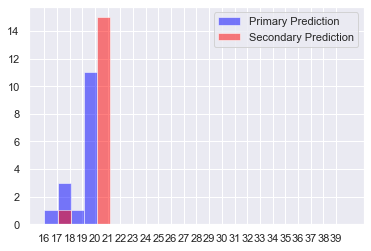

In [135]:
plot_pred(20,20)

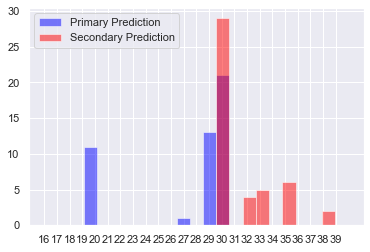

In [136]:
plot_pred(30,30)

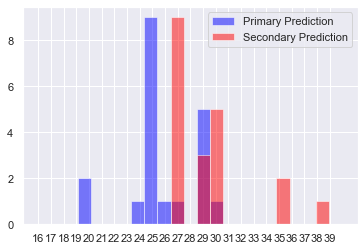

In [139]:
plot_pred(25,30)

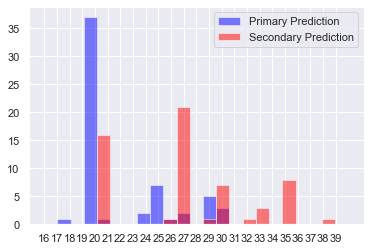

In [137]:
plot_pred(20,30)

In [57]:
mean_pred = {}
for pair in predictions:
    predictions[pair] = np.array(predictions[pair])
    #print(np.shape(predictions[pair]))
    if len(predictions[pair]) != 0:
        mean_pred[pair] = np.mean(predictions[pair],axis = 0)
    else:
        print('No test values for:', pair)

No test values for: (23, 33)
No test values for: (25, 37)
No test values for: (23, 38)
No test values for: (26, 39)
No test values for: (31, 39)
No test values for: (23, 37)
No test values for: (32, 39)
No test values for: (19, 39)
No test values for: (29, 38)
No test values for: (25, 38)
No test values for: (24, 37)
No test values for: (24, 38)
No test values for: (34, 39)
No test values for: (39, 39)
No test values for: (18, 39)


In [143]:
def acc_map(results, title = 'Secondary Prediction Accuracy', annotation = False):
    plt.figure(figsize = (8,7), facecolor='white')
    ax = sns.heatmap(results, cmap = "mako", annot = annotation)
    labels = ['M6','M7','M8','M9','L0','L1','L2','L3','L4','L5','L6','L7','L8','L9','T0','T1','T2','T3','T4','T5','T6','T7','T8']
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    ax.patch.set_edgecolor('black')  
    ax.patch.set_linewidth('10') 
    ax.set_ylabel('Primary')
    ax.set_xlabel('Secondary')
    ax.set_title(title)

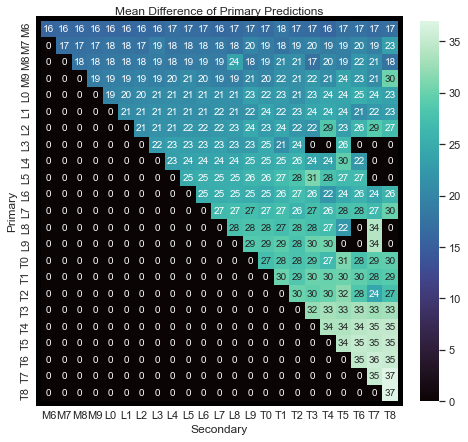

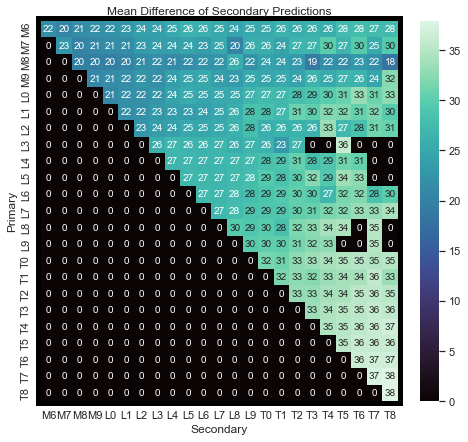

In [144]:
pri_mean = np.zeros((23,23))
sec_mean = np.zeros((23,23))

for primary in range(16,39):
    for secondary in range(primary, 39):
        try:
            mu = mean_pred[(primary,secondary)]
        except:
            mu = [0,0]
        pri_mean[primary-16,secondary-16] = mu[0]
        sec_mean[primary-16,secondary-16] = mu[1]
        
acc_map(pri_mean, 'Mean Difference of Primary Predictions', annotation = True)
acc_map(sec_mean, 'Mean Difference of Secondary Predictions', annotation = True)

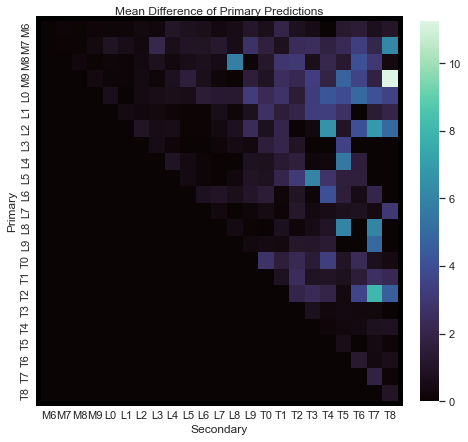

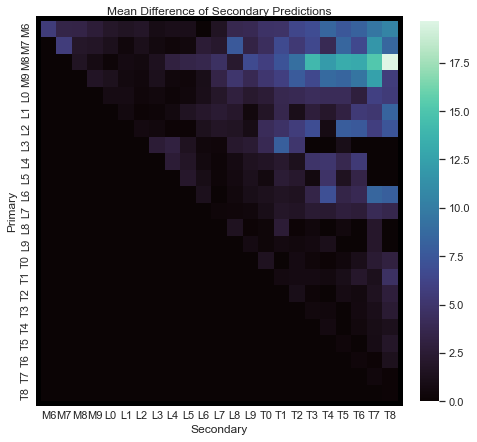

In [146]:
pri_mean = np.zeros((23,23))
sec_mean = np.zeros((23,23))

for primary in range(16,39):
    for secondary in range(primary, 39):
        try:
            mu = abs(mean_pred[(primary,secondary)] - (primary,secondary))
        except:
            mu = [0,0]
        pri_mean[primary-16,secondary-16] = mu[0]
        sec_mean[primary-16,secondary-16] = mu[1]
        
acc_map(pri_mean, 'Mean Difference of Primary Predictions')
acc_map(sec_mean, 'Mean Difference of Secondary Predictions')

Primaries:
- After fixing a primary type, as Secondary gets smaller (number increases), predicted primaries get smaller
- AKA Unequal pairs like (16,30) will be predicted with a smaller primary

Secondary:
- Likewise, fixing a secondary, as primary gets bigger (number decreases), predicted secondary gets bigger
- Unequal pairs will predict a bigger secondary

Overall:
- This model consistently predicts the unequal primary and secondary types to be closer together 
- Bad at predicting secondary type, especially when the secondary is big (look at (16,16), (17,17), and (18,18) )